# Import Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt#Data Visualization Libraries
import seaborn as sns #Data Visualization Libraries
import warnings
warnings.filterwarnings('ignore')
#pd.set_option("display.max_rows",1000)

# Load the Data

In [3]:
df=pd.read_csv("day.csv")

In [4]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
df.shape

(730, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [ ]:
# https://cdn.upgrad.com/uploads/production/0fdfa494-a9bf-4b32-873f-900e3b262948/Readme.txt

In [7]:
for i in df.columns:
    print(i,df[i].nunique())

instant 730
dteday 730
season 4
yr 2
mnth 12
holiday 2
weekday 7
workingday 2
weathersit 3
temp 498
atemp 689
hum 594
windspeed 649
casual 605
registered 678
cnt 695


In [10]:
cont_cols=["temp","atemp","hum","windspeed","casual","registered","cnt"]
cat_cols=["season","yr","mnth","holiday","weekday","workingday","weathersit"]
id_cols=["instant","dteday"]

In [11]:
len(cont_cols)+len(cat_cols)+len(id_cols)

16

In [12]:
## Missing Values

In [13]:
df.isnull().mean()#percentage of missing values

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [ ]:
df.isnull().sum()##count of missing values

## EDA --> Exploratory Data Analysis

## What is the effect of wheather conditions on demand of bikes (cnt)?

In [ ]:
## Univariate Analysis --> Analysis with Single variable
--> Mean, Median, Max, Min, Std, Variance, Count
--> Distribution (Histogram,Distplot,Countplot,boxplot)
## Bivaraite Analsyis --> Analysis with two variables
--> Relationship between two variables (Scatterplot, boxplot,barplot etc)
## Multivariate Analysis (Optional)
--> Relationship between more than variables

<AxesSubplot:xlabel='season', ylabel='count'>

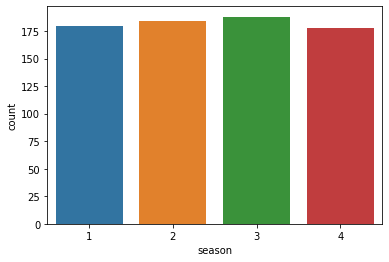

In [14]:
sns.countplot(df["season"])

<AxesSubplot:xlabel='temp', ylabel='cnt'>

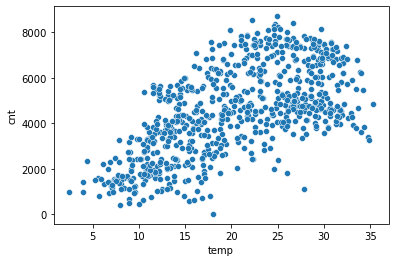

In [15]:
sns.scatterplot(df["temp"],df["cnt"])

<AxesSubplot:xlabel='mnth', ylabel='temp'>

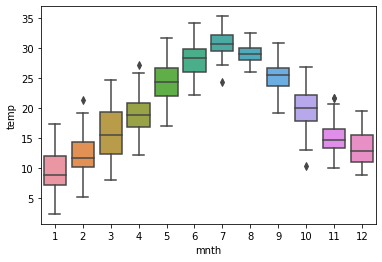

In [16]:
sns.boxplot(df["mnth"],df["temp"])

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

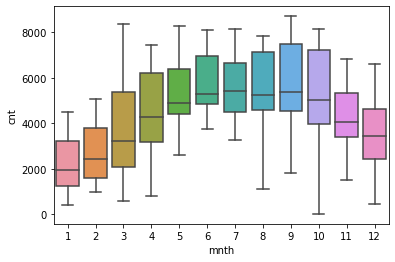

In [17]:
sns.boxplot(df["mnth"],df["cnt"])

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

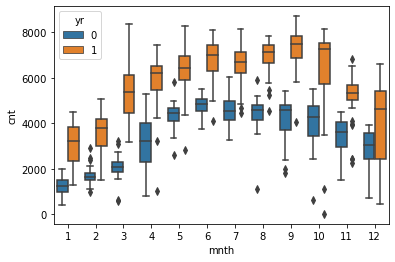

In [19]:
sns.boxplot(df["mnth"],df["cnt"],hue=df["yr"])

<AxesSubplot:>

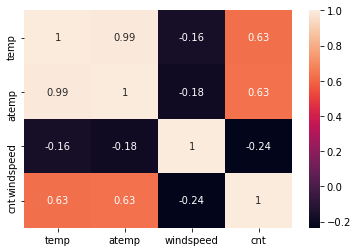

In [21]:
sns.heatmap(df[["temp","atemp","windspeed","cnt"]].corr(),annot=True)

## Mean Vs Median

In [23]:
import numpy as np

arr=np.array([1,2,3,4,5])

print("Mean:",arr.mean())

print("Median:",np.median(arr))

## Whenever there are no outliers we can go either with mean inputation or median imputation

Mean: 3.0
Median: 3.0


In [24]:
import numpy as np

arr=np.array([1,2,3,4,5,100])

print("Mean:",arr.mean())

print("Median:",np.median(arr))

## Whenever there are outliers we should go with median imputation

Mean: 19.166666666666668
Median: 3.5


## Missing Value Imputation

In [29]:
pd.set_option("display.max_rows",1000)

In [25]:
df=pd.read_csv("housing.csv")

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [27]:
df.shape

(1460, 81)

In [41]:
temp=df.isnull().mean().reset_index()
temp=temp.rename(columns={"index":"Column Name",0:"Missing Value Fraction"})
temp=temp.sort_values(by="Missing Value Fraction",ascending=False)

In [45]:
drop_cols=list(temp[temp["Missing Value Fraction"]>0.5]["Column Name"])

In [46]:
drop_cols

['PoolQC', 'MiscFeature', 'Alley', 'Fence']

In [47]:
df1=df.drop(drop_cols,axis=1)

In [48]:
df1.shape

(1460, 77)

In [49]:
df["LotFrontage"].isnull().mean()

0.1773972602739726

In [50]:
df["LotFrontage"]

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

<AxesSubplot:xlabel='LotFrontage'>

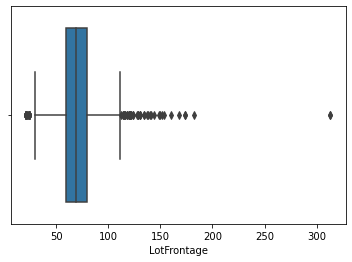

In [51]:
sns.boxplot(df["LotFrontage"])

In [53]:
median=df1["LotFrontage"].median()
df1["LotFrontage"].fillna(median,inplace=True)
#df1["LotFrontage"]=df1["LotFrontage"].fillna(median)

In [55]:
df1["LotFrontage"].isnull().mean()

0.0

In [ ]:
cont_cols=["a","b","c","d","e"]
for i in cont_cols:
    median=df1[i].median()
    df1[i].fillna(median,inplace=True)
    

# Outliers Identification
# Outlier Treatment

<AxesSubplot:xlabel='LotFrontage'>

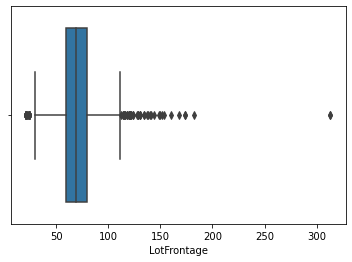

In [56]:
sns.boxplot(df["LotFrontage"])

In [59]:
df1["LotFrontage"].describe()

count    1460.000000
mean       69.863699
std        22.027677
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [60]:
q1=59.000000 #(25th percentile)
q3=80.000000 #(75th percentile)
iqr=q3-q1 #(Inter quartile range)
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
lower_bound,upper_bound

(27.5, 111.5)

In [64]:
df1[df1["LotFrontage"]<lower_bound]["LotFrontage"]

(42,)

In [65]:
df1[df1["LotFrontage"]>upper_bound]["LotFrontage"]

36      112.0
41      115.0
85      121.0
86      122.0
150     120.0
159     134.0
171     141.0
197     174.0
231     174.0
260     120.0
276     129.0
277     140.0
290     120.0
302     118.0
306     116.0
313     150.0
429     130.0
446     137.0
523     130.0
662     120.0
807     144.0
825     114.0
889     128.0
906     116.0
909     149.0
934     313.0
963     122.0
966     130.0
991     121.0
1010    115.0
1061    120.0
1106    114.0
1107    168.0
1127    182.0
1151    134.0
1168    120.0
1169    118.0
1173    138.0
1182    160.0
1211    152.0
1273    124.0
1298    313.0
1337    153.0
1339    120.0
1359    129.0
1361    124.0
Name: LotFrontage, dtype: float64

In [ ]:
## Outliers on higher side(>upper_bound) capped at upper_bound (Capping)
## Outliers on lower side (<lower_bound) floor at lower_bound (Flooring)

In [67]:
## Capping
df1["LotFrontage"]=np.where(df1["LotFrontage"]>upper_bound,upper_bound,df1["LotFrontage"])

## Flooring
df1["LotFrontage"]=np.where(df1["LotFrontage"]<lower_bound,lower_bound,df1["LotFrontage"])

<AxesSubplot:xlabel='LotFrontage'>

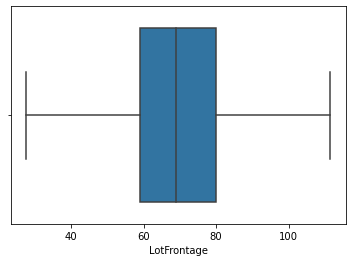

In [69]:
sns.boxplot(df1["LotFrontage"])

In [ ]:
def outlier(cont_cols):  
    for i in cont_cols:
        q1=df1[i].describe()["25%"]
        q3=df1[i].describe()["75%"]
        iqr=q3-q1 #(Inter quartile range)
        lower_bound=q1-1.5*iqr
        upper_bound=q3+1.5*iqr
        ## Capping
        if len(df1[df1[i]>upper_bound][i])>0:
            df1[i]=np.where(df1[i]>upper_bound,upper_bound,df1[i])

        ## Flooring
        if len(df1[df1[i]<lower_bound][i])>0:
            df1[i]=np.where(df1[i]<lower_bound,lower_bound,df1[i])

In [74]:
df1["LotFrontage"].describe()["25%"]

59.0